# TMDB Movies

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
df=pd.read_csv('tmdb-movies.csv')

In this project I have answered the questions below:

1)Is there a correlation in between the budget and the revenue ?

2)Does high budget movies mean high profit?

3)Which movie has the highest profit ?

4)What does the visual representation of popularity and revenue relationship look like for the year 2015?

5)What does the visual representation of vote_average and revenue relationship look like for the year 2015?

6)What is the maximum runtime? What movie has the maximum runtime? 

7)What are details of the movie with the highest revenue? Such as release date, director and so on. 

8)Which director has the highest vote_average ?



# Data Wrangling Phase

In this step, I have cleaned the value '0's from the revenue_adj and budget_adj. This has also cleared the values that have revenue and budget '0' as adjusted ones are calculated based on them.

In [204]:
df_100=df[df.budget_adj !=0]                   #removes the movies with 0 budget

In [205]:
df_101=df_100[df_100.revenue_adj !=0]          #removes the movies with 0

In [206]:
df_102=df_101.dropna()                         #frees from Nans.. df_102 is the CLEAN dataframe --No '0's no NaNs

CONCLUSION: All the data has been cleaned from the important missing information.

# Correlation - Question 1)

This phase answers the question: 

1)Is there a correlation in between the budget and the revenue ?

Lets see below

In [207]:
df_102_correlation=df_102.corr()    #calculates the correlation for the whole clean dataset
print (df_102_correlation)

                    id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.189301 -0.050921 -0.031441 -0.013123    0.059368   
popularity    0.189301    1.000000  0.432791  0.594755  0.322390    0.744088   
budget       -0.050921    0.432791  1.000000  0.706888  0.337373    0.583038   
revenue      -0.031441    0.594755  0.706888  1.000000  0.371226    0.775374   
runtime      -0.013123    0.322390  0.337373  0.371226  1.000000    0.426505   
vote_count    0.059368    0.744088  0.583038  0.775374  0.426505    1.000000   
vote_average  0.004985    0.355904  0.075168  0.296501  0.385210    0.464812   
release_year  0.494397    0.059243  0.179160  0.028022 -0.071863    0.071290   
budget_adj   -0.116021    0.419863  0.985112  0.713706  0.361985    0.572798   
revenue_adj  -0.102211    0.549299  0.566835  0.913802  0.371980    0.703183   

              vote_average  release_year  budget_adj  revenue_adj  
id                0.004985      0.494397   -0.11602

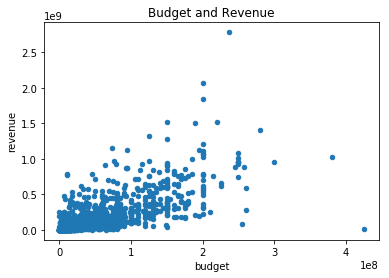

In [208]:
df_102.plot.scatter(title='Budget and Revenue', x='budget', y='revenue')

NOTE: The positive correlation in between the budget and revenue can also be seen from the above graph. 
When one icreases the other does the same. However as one could see, the dot at the far right (the movie with the highest budget) did not get the highest revenue so this means higher budget does not guarantee higher revenues.

LIMITATION: As the database has around 10,000 movies and the similarity in the -revenue and budget- relationship, causes clusters and  it is hard to see every indiviual movies/budgets on the plot. However it still gives a general idea.  

CONCLUSION: 
            Yes, there is a positive correlation (70.68%) in between revenue and the budget.
            
            The direction of the density in the scatter plot proves the same relationship. 
            
            This means higher budget movies have high possibility to get higher revenues.

# Budget and Profit - Questions 2 & 3)

This section answer the following questions :

2)Does the highest budget movie have the highest profit?

3)Which movie has the highest profit ?

GOOD TO KNOW: 
    Here in this section and usually, I have used adjusted budget and revenue to be able to compare older data with the recent ones. 
    "_adj" shows the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inlation over time.

In [209]:
df_array=(np.array(df_102[['budget_adj','revenue_adj']]))            #turns DataFrame to a NumPy array

In [210]:
df_array[:,0].max()                          #finds the max from the column

425000000.0

The movie The Warrior's Way has the highest budget_adj.

In [211]:
df_array[:,0].argmax()                       #.argmax() shows the position of the maximum value 

404

In [212]:
rev=df_array[:,1]               #calls the whole revenue_adj column
bud=df_array[:,0]               #calls the whole budget_adj  column

In [213]:
#Below function gives us the maximum profit in $ and its position.

def max_profit(df_array):
    profit=(rev-bud)
    max_pro=profit[:].max()                   #maximum profit 
    max_pro_position=profit[:].argmax()             
    return (max_pro,max_pro_position)
max_profit(df_array)

(2750136650.919176, 163)

CONCLUSION: 
            NO.The highest budget movie (The Warrior's Way) didn't get the highest profit.
            
            The position shows that the most profitable movie is Star Wars.

            According to the previous correlation (question 1) , 
            
            high budget movies tend to have higher revenues but that  does   
            
            not mean higher profits.

LIMITATION : Need to keep in mind that these are based on adjusted income, the Star Wars movie has been released in 1977.

# Visual Representation - Questions 4 & 5)

This section answers the questions:
   
    4)What does the visual representation of popularity and revenue relationship look like for the year 2015?

    5)What does the visual representation of vote_average and revenue relationship look like for the year 2015?
    

Plot for question 4

In [214]:
df2015 = df_102[df_102.release_year==2015]              # calls only the year 2015 data

Text(0,0.5,'popularity')

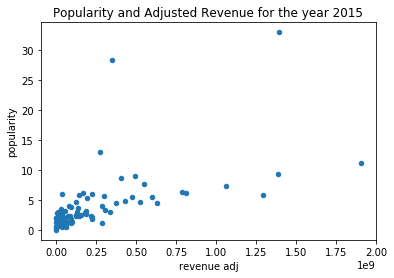

In [215]:
ay=df2015.plot(kind='scatter',title='Popularity and Adjusted Revenue for the year 2015', x='revenue_adj', y='popularity')     #scatter plot
ay.set_xlabel('revenue adj')           #to set the label
ay.set_ylabel('popularity')         #to set the label


Plot for question 5

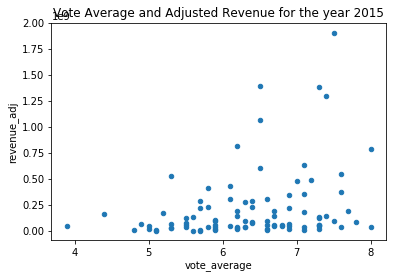

In [216]:
df2015.plot.scatter(title='Vote Average and Adjusted Revenue for the year 2015', x='vote_average', y='revenue_adj')

CONCLUSION: 
            Based on the first plot ,the popularity does not gurantee the highest revenue.

            However as we can see the number of dots are increasing from bottom left corner to the top right corner.
            
            This is also true based on the correlation that has been done for the 1st question. 
            
            There we can see that there is a 54.92% positive corrrelation in between the popularity and adjusted revenue.  
            
            According to second plot, as the vote average gets higher , so does the revenue.
            

ROOM FOR IMPROVEMENT: 
                    The analysis can be improved by investigating the relationship in between the month of the year and revenue.
                    
                    This would give producers better idea about when to release the movies. 

EXTRA -  Below, gives us an idea about the financial side of the whole industry.   

In [217]:
df_bud_rev=df_102[['budget_adj','revenue_adj']]
df_details=df_bud_rev.describe()
print(df_details)

         budget_adj   revenue_adj
count  1.287000e+03  1.287000e+03
mean   5.462994e+07  1.991775e+08
std    5.525463e+07  2.968515e+08
min    9.693980e-01  4.300000e+01
25%    1.519180e+07  2.764890e+07
50%    3.556927e+07  8.674770e+07
75%    7.630125e+07  2.351178e+08
max    4.250000e+08  2.827124e+09


# 1D Exploration - Maximum runtime - Question 6)

This section answers the questions:

6) What is the maximum runtime? What movie has the maximum runtime? 

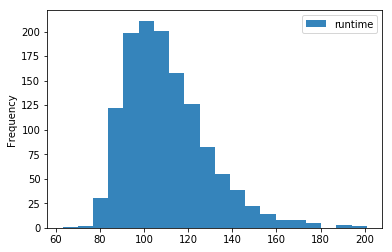

In [218]:
df_runtime=df_102[['runtime']]                         #calling runtime column form df_102(clean data)
df_runtime.plot.hist(alpha=0.9, bins=20)               #plot

In [219]:
df_runtime.loc[df_runtime['runtime'].idxmax()]                  #gives the max number 

runtime    201
Name: 4949, dtype: int64

In [220]:
df_topruntime = df_102[df_102.runtime==201]                     #finds the movie with that ran 201 times

In [221]:
print (df_topruntime)                        #prints the name of the movie with the max runtime

       id    imdb_id  popularity    budget     revenue  \
4949  122  tt0167260    7.122455  94000000  1118888979   

                                     original_title  \
4949  The Lord of the Rings: The Return of the King   

                                                   cast  \
4949  Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   

                           homepage       director  \
4949  http://www.lordoftherings.net  Peter Jackson   

                              tagline      ...       \
4949  The eye of the enemy is moving.      ...        

                                               overview runtime  \
4949  Aragorn is revealed as the heir to the ancient...     201   

                        genres           production_companies release_date  \
4949  Adventure|Fantasy|Action  WingNut Films|New Line Cinema      12/1/03   

     vote_count  vote_average  release_year    budget_adj   revenue_adj  
4949       5636           7.9          2003  1.114231e+08  1.326278

LIMITATION ! ! ! 

There are other movies that have been run more than 201 times however, 
                 
as I have cleaned the data from zero budget and zero revenue. 

Lord of the Rings: The Return of the King is the one with highest runtime. 


CONCLUSION: 

            The highest runtime is 201 times.
            
            The movie is Lord of the Rings: The Return of the King

# The movie with highest revenue - Question 7)

This section answer the question:
    
    7)What are details of the movie with the highest revenue? Such as release date, director and so on.

In [222]:
df.loc[df['revenue_adj'].idxmax()]                       #finds the max revenue and all the corresponding data with it

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

CONCLUSION: The list above answers the question 6 and shows all the details about the movie with the all time high revenue.

EXTRA - 
The list below shows the relation in between the five movies that got the highest revenue_adj and their corresponding vote_average. 

In [223]:
df_102_plot=df_102[['revenue_adj','vote_average','original_title']]    
df_102_plot.sort_values(by='revenue_adj', ascending=False).head()                       #sorts values

,revenue_adj,vote_average,original_title
1386,2.827124e+09,7.1,Avatar
1329,2.789712e+09,7.9,Star Wars
5231,2.506406e+09,7.3,Titanic
10594,2.167325e+09,7.2,The Exorcist
9806,1.907006e+09,7.3,Jaws


# Directors - Question 8)

This section answers the follwing question and gives a bit more extra and show all the directors , their movies and averages.
    
    8)Which director has the highest vote_average ?


In [224]:
df=pd.read_csv('tmdb-movies.csv')
df_director=pd.DataFrame(np.array(df[['original_title','director', 'vote_average']])) #to convert numpy array to a dataframe
df_director.rename(columns={0:'original_title', 1:'director', 2:'vote_average'}, inplace=True) 

In [225]:
#Shows the director of every movie and their vote_average
for i in range(len(df_director)):
    director=df_director.director
    director=director[i]
    vote_average=df_director.vote_average
    vote_average=vote_average[i]
    original_title=df_director.original_title
    original_title=original_title[i]
    
    print ('Director of {}, {} has average {}'.format(original_title,director,vote_average))

Director of Jurassic World, Colin Trevorrow has average 6.5
Director of Mad Max: Fury Road, George Miller has average 7.1
Director of Insurgent, Robert Schwentke has average 6.3
Director of Star Wars: The Force Awakens, J.J. Abrams has average 7.5
Director of Furious 7, James Wan has average 7.3
Director of The Revenant, Alejandro GonzÃ¡lez IÃ±Ã¡rritu has average 7.2
Director of Terminator Genisys, Alan Taylor has average 5.8
Director of The Martian, Ridley Scott has average 7.6
Director of Minions, Kyle Balda|Pierre Coffin has average 6.5
Director of Inside Out, Pete Docter has average 8.0
Director of Spectre, Sam Mendes has average 6.2
Director of Jupiter Ascending, Lana Wachowski|Lilly Wachowski has average 5.2
Director of Ex Machina, Alex Garland has average 7.6
Director of Pixels, Chris Columbus has average 5.8
Director of Avengers: Age of Ultron, Joss Whedon has average 7.4
Director of The Hateful Eight, Quentin Tarantino has average 7.4
Director of Taken 3, Olivier Megaton has a

Director of Kelly & Cal, Jen McGowan has average 5.9
Director of Cat Run 2, John Stockwell has average 4.3
Director of The Remaining, Casey La Scala has average 4.3
Director of Apocalypse Pompeii, Ben Demaree has average 5.3
Director of The Search for General Tso, Ian Cheney has average 6.9
Director of Take Care, Liz Tuccillo has average 5.6
Director of Low Down, Jeff Preiss has average 4.8
Director of The Prophet, Roger Allers has average 7.3
Director of JohnnyExpress, Kyungmin Woo has average 7.8
Director of Sharktopus vs Pteracuda, Kevin O'Neill has average 3.7
Director of Mrs. Brown's Boys D'Movie, Ben Kellett has average 5.2
Director of Listen Up Philip, Alex Ross Perry has average 5.9
Director of Iverson, Zatella Beatty has average 7.2
Director of The Road Within, Gren Wells has average 6.9
Director of Ascension, Mairzee Almas|Nick Copus|Robert Lieberman has average 5.5
Director of Dans la cour, Pierre Salvadori has average 4.9
Director of Crawl or Die, Oklahoma Ward has average 

Director of Fat, Sick & Nearly Dead, Joe Cross|Kurt Engfehr has average 7.2
Director of The Two Escobars, Jeff Zimbalist|Michael Zimbalist has average 7.5
Director of Freshman Father, Michael Scott has average 5.8
Director of 600 kilos d'or pur, Ã‰ric Besnard has average 5.1
Director of The Encounter, David A.R. White has average 4.9
Director of Birdemic: Shock and Terror, James Nguyen has average 2.1
Director of Kevin Hart: Seriously Funny, Shannon Hartman has average 7.7
Director of BearCity, Douglas Langway has average 5.5
Director of Doctor Who: A Christmas Carol, nan has average 7.7
Director of ê³ ì‚¬ ë‘ ë²ˆì§¸ ì´ì•¼ê¸°: êµìƒì‹¤ìŠµ, Seon-dong Yu has average 5.2
Director of Action Replayy, Vipul Amrutlal Shah has average 4.9
Director of Veer, Anil Sharma has average 5.0
Director of Christmas Cupid, Gil Junger has average 5.1
Director of Once Upon a Time in Mumbaai, Milan Luthria has average 7.0
Director of Une Petite zone de turbulences, Alfred Lot has average 5.5
Director of The D

Director of God Bless America, Bobcat Goldthwait has average 6.8
Director of Bully, Lee Hirsch has average 7.5
Director of Adele - Live at the Royal Albert Hall, Paul Dugdale has average 7.4
Director of Tactical Force, Adamo P. Cultraro has average 5.1
Director of 4:44 Last Day on Earth, Abel Ferrara has average 4.2
Director of Ironclad, Jonathan English has average 6.0
Director of The Music Never Stopped, Jim Kohlberg has average 7.3
Director of The Task, Alex Orwell has average 4.9
Director of Don't Let Him In, Kelly Smith has average 3.5
Director of Friends with Kids, Jennifer Westfeldt has average 5.7
Director of Never Back Down 2: The Beatdown, Michael Jai White has average 5.7
Director of Forks Over Knives, Lee Fulkerson has average 6.7
Director of Shark Night, David R. Ellis has average 5.1
Director of Teen Spirit, Gil Junger has average 5.4
Director of United, James Strong has average 7.2
Director of Take Me Home, Sam Jaeger has average 6.9
Director of Largo Winch II, JÃ©rÃ´me 

Director of Crime Spree, Brad Mirman has average 6.3
Director of 44 Minutes: The North Hollywood Shoot-Out, Yves Simoneau has average 6.2
Director of DÃ©dales, RenÃ© Manzor has average 6.5
Director of Charlie: The Life and Art of Charles Chaplin, Richard Schickel has average 6.4
Director of Alien Hunter, Ron Krauss has average 4.2
Director of Leprechaun: Back 2 tha Hood, Steven Ayromlooi has average 6.0
Director of The Cooler, Wayne Kramer has average 6.5
Director of Good Boy!, John Robert Hoffman has average 4.9
Director of Touching the Void, Kevin Macdonald has average 7.5
Director of Veronica Guerin, Joel Schumacher has average 6.7
Director of Luther, Eric Till has average 6.3
Director of Rugrats Go Wild, John Eng|Norton Virgien has average 5.3
Director of Soldier's Girl, Frank Pierson has average 5.9
Director of All the Real Girls, David Gordon Green has average 5.6
Director of Blind Horizon, Michael Haussman has average 5.9
Director of My Boss's Daughter, David Zucker has average 

Director of The Departed, Martin Scorsese has average 7.7
Director of The Holiday, Nancy Meyers has average 6.7
Director of The Prestige, Christopher Nolan has average 7.8
Director of Night at the Museum, Shawn Levy has average 6.2
Director of Babel, Alejandro GonzÃ¡lez IÃ±Ã¡rritu has average 6.7
Director of Children of Men, Alfonso CuarÃ³n has average 7.3
Director of American Pie Presents: The Naked Mile, Joe Nussbaum has average 5.3
Director of Superman Returns, Bryan Singer has average 5.3
Director of Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan, Larry Charles has average 6.4
Director of Click, Frank Coraci has average 5.9
Director of Brother Bear 2, Ben Gluck has average 6.4
Director of The Break-Up, Peyton Reed has average 5.5
Director of Inside Man, Spike Lee has average 7.2
Director of Over the Hedge, Tim Johnson|Karey Kirkpatrick has average 6.2
Director of Perfume: The Story of a Murderer, Tom Tykwer has average 7.0
Director of Blood Diam

Director of Broken English, Zoe R. Cassavetes has average 6.6
Director of Stomp the Yard, Sylvain White has average 6.1
Director of Virgin Territory, David Leland has average 4.5
Director of Die FÃ¤lscher, Stefan Ruzowitzky has average 6.9
Director of Hallam Foe, David Mackenzie has average 6.7
Director of Boarding Gate, Olivier Assayas has average 5.3
Director of Sex and Death 101, Daniel Waters has average 5.5
Director of Gruz 200, Aleksey Balabanov has average 6.9
Director of Pigs, Karl DiPelino has average 4.1
Director of Dead Silence, James Wan has average 6.2
Director of Postal, Uwe Boll has average 5.3
Director of Welcome, Anees Bazmee has average 6.9
Director of Botched, Kit Ryan has average 6.4
Director of Une vieille maÃ®tresse, Catherine Breillat has average 6.7
Director of Superman: Doomsday, Lauren Montgomery|Bruce Timm has average 6.4
Director of Joshua, George Ratliff has average 6.2
Director of The Girl in the Park, David Auburn has average 6.2
Director of Savage Grace,

Director of Clay Pigeons, David Dobkin has average 6.1
Director of Slums of Beverly Hills, Tamara Jenkins has average 6.1
Director of Children of the Corn V: Fields of Terror, Ethan Wiley has average 3.3
Director of The Temptations, Allan Arkush has average 6.7
Director of 3 Ninjas: High Noon at Mega Mountain, Sean McNamara has average 4.0
Director of The Batman Superman Movie: World's Finest, Toshihiko Masuda has average 7.0
Director of Paulie, John Roberts has average 5.9
Director of A Murder of Crows, Rowdy Herrington has average 6.0
Director of Billboard Dad, Alan Metter has average 6.4
Director of Moby Dick, Franc Roddam has average 5.2
Director of New Rose Hotel, Abel Ferrara has average 4.8
Director of Last Night, Don McKellar has average 6.7
Director of Ghulam, Vikram Bhatt has average 5.0
Director of The Little Mermaid, Ron Clements|John Musker has average 7.1
Director of Indiana Jones and the Last Crusade, Steven Spielberg has average 7.4
Director of When Harry Met Sally..., 

Director of Badlands, Terrence Malick has average 7.3
Director of Coffy, Jack Hill  has average 7.1
Director of The Vault of Horror, Roy Ward Baker has average 6.5
Director of Sisters, Brian De Palma has average 7.0
Director of The Train Robbers, Burt Kennedy has average 6.8
Director of A Charlie Brown Thanksgiving, Bill Melendez|Phil Roman has average 7.6
Director of Walking Tall, Phil Karlson has average 6.4
Director of Frankenstein and the Monster from Hell, Terence Fisher has average 6.7
Director of The Holy Mountain, Alejandro Jodorowsky has average 7.4
Director of Electra Glide in Blue, James William Guercio has average 6.1
Director of The Friends of Eddie Coyle, Peter Yates has average 6.9
Director of The Way We Were, Sydney Pollack has average 6.9
Director of VÃ©ritÃ©s et Mensonges, Orson Welles has average 7.0
Director of The Offence, Sidney Lumet has average 7.3
Director of The Satanic Rites of Dracula, Alan Gibson has average 4.8
Director of Sssssss, Bernard L. Kowalski has 

In [226]:
df_102.loc[df_102['vote_average'].idxmax()]     

id                                                                    238
imdb_id                                                         tt0068646
popularity                                                        5.73803
budget                                                            6000000
revenue                                                         245066411
original_title                                              The Godfather
cast                    Marlon Brando|Al Pacino|James Caan|Richard S. ...
homepage                                     http://www.thegodfather.com/
director                                             Francis Ford Coppola
tagline                                        An offer you can't refuse.
keywords                italy|love at first sight|loss of father|patri...
overview                Spanning the years 1945 to 1955, a chronicle o...
runtime                                                               175
genres                                

IMPORTANT LIMITATION ! ! !    Even though there are movies with higher vote avetages than 8.3, as I have used the cleaned data, 

                                the movies with '0' budget and or revenues are NOT included in this list.


CONCLUSION: Director Francis Ford Coppola has the highest vote average.  